In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 30
EPOCHS = 6

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-09T17:12:36.397Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-09T17:12:36.397Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-09T17:12:36.398Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-09T17:12:36.398Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-09T17:12:36.770Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-09T17:12:36.771Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-09T17:12:36.772Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-09T17:12:36.772Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-09T17:13:49.054Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-09T17:13:49.055Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-09T17:13:49.056Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-09T17:13:49.057Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:13:49] "POST /6 HTTP/1.1" 200 -
2021-06-09T17:13:52.166Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-09T17:13:52.167Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-09T17:13:52.168Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-09T17:13:52.169Z | 1.0.5 | INFO | werkzeug                               

In [ ]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-09T17:14:22.481Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-09T17:14:22.482Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-09T17:14:22.483Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-09T17:14:22.484Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-09T17:14:22.484Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-09T17:14:23.097Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-09T17:14:23.098Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-09T17:14:23.098Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-09T17:14:23.099

2021-06-09T17:16:25.908Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:16:25] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:16:25.910Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:16:25.910Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:16:25] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:16:25.960Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:16:25] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:16:26.008Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:16:26] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:16:26.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:16:26] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:16:26.103Z | 1.0.5 | INFO | werkzeug                                         

2021-06-09T17:17:46.567Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:17:46] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:17:46.568Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:17:46.570Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:17:46.572Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:17:46.573Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:17:46.574Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:17:46.614Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:17:46] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:17:46.664Z | 1.0.5 | INFO | werkzeug                

2021-06-09T17:19:05.043Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:19:05.085Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:19:05] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:19:05.087Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:19:05.088Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:19:05.102Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:19:05.103Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:19:05.132Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:19:05] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:19:05.133Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-09T17:20:28.524Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:20:28] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:20:28.540Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:20:28.565Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:20:28] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:20:28.566Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:20:28.567Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:20:28.569Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:20:28.616Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:20:28] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:20:28.666Z | 1.0.5 

2021-06-09T17:21:50.522Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-09T17:21:50.575Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:21:50] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:21:50.625Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:21:50.694Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:21:50] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:21:50.839Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:21:50.849Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:21:50.853Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:21:50.857Z | 1.0.5 | INFO | ibmfl.connection.flask_con

2021-06-09T17:23:14.998Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:23:14] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:23:15.076Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:23:15] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:23:15.106Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:23:15.171Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:23:15.193Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:23:15] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:23:15.273Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:23:15] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:23:15.394Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-09T17:24:36.171Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:24:36] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:24:36.301Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-09T17:24:36.444Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:24:36.453Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:24:36.546Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:24:36] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:24:36.608Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:24:36] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:24:36.637Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:24:36.727Z | 1.0.5 | 

2021-06-09T17:25:57.568Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:25:57] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:25:58.666Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-09T17:25:58.871Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:25:59.387Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:25:59] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:26:01.374Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:26:01.471Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:26:01] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:26:01.630Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:26:01.719Z | 1.0.5 | 

2021-06-09T17:27:11.798Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-09T17:27:12.090Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:27:13.125Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:27:13] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:27:16.802Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-09T17:27:17.032Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:27:17.378Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:27:17] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:27:17.853Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:27:18.405Z | 1.0.5 | INFO | werkzeug                    

2021-06-09T17:28:09.874Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-09T17:28:14.882Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-09T17:28:19.894Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-09T17:28:24.899Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-09T17:28:29.914Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-09T17:28:31.027Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:28:31.722Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:28:31] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:28:33.691Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-09T17:29:07.750Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-09T17:29:12.755Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-09T17:29:17.766Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-09T17:29:22.771Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-09T17:29:27.791Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-09T17:29:32.798Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-09T17:29:37.810Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-09T17:29:42.818Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-09T17:29:47.830Z

2021-06-09T17:30:05.426Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-09T17:30:10.434Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-09T17:30:15.440Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-09T17:30:20.450Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-09T17:30:25.458Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-09T17:30:30.462Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-09T17:30:35.466Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-09T17:30:40.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-09T17:30:45.481Z 

2021-06-09T17:31:25.590Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-09T17:31:25.590Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-09T17:31:27.772Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-09T17:31:27.774Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-09T17:31:27.775Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-09T17:31:27.775Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-09T17:31:32.778Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-09T17:31:37.786Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-09

2021-06-09T17:32:47.932Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-09T17:32:47.933Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-09T17:32:47.933Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-09T17:32:47.934Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-09T17:32:47.977Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f04a1a69160>
2021-06-09T17:32:47.977Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-09T17:32:47.978Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-09T17:32:50.072Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-09T17:34:08.378Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:34:08] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:34:08.420Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:34:08] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:34:08.458Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:34:08] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:34:08.494Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:34:08] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:34:10.238Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:80
2021-06-09T17:34:10.239Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-09T17:34:10.239Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-09T17:35:30.727Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:35:30.768Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:35:30] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:35:30.807Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:35:30] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:35:30.845Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:35:30] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:35:30.921Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:35:30] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:35:30.936Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:35:30] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:35:31.002Z | 1.0.5 | INFO | werkzeug                                         

2021-06-09T17:36:55.123Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:36:55] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:36:55.124Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:36:55.149Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:36:55.150Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:36:55] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:36:55.167Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:36:55.192Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:36:55] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:36:55.230Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:36:55] "POST /7 HTTP/1.1" 200 -


2021-06-09T17:38:14.643Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:38:14.644Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:38:14.646Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:38:14.647Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:38:14.651Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:38:14.689Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:38:14.690Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:38:14] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:38:14.705Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-09T17:39:38.641Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:39:38.688Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:39:38.690Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:39:38.691Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:39:38] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:39:38.730Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:39:38] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:39:38.734Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:39:38.737Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:39:38.739Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-09T17:41:04.296Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:41:04] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:41:04.297Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:41:04.299Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:41:04.336Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:41:04] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:41:04.337Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:41:04.354Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:41:04.379Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:41:04] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:41:04.418Z | 1.0.5 

2021-06-09T17:42:27.351Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:42:27] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:42:27.398Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:42:27] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:42:27.489Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:42:27.495Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:42:27.538Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:42:27] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:42:27.539Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:42:27.578Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:42:27] "POST /7 HTTP/1.1" 200 -


2021-06-09T17:43:50.214Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:43:50] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:43:50.330Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:43:50] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:43:50.855Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:43:50.962Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:43:50] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:43:51.069Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:43:51.143Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:43:51] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:43:51.226Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-09T17:45:05.492Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:45:05] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:45:07.818Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-09T17:45:08.767Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:45:09.243Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:45:09] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:45:10.035Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:45:10.298Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:45:10] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:45:10.799Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:45:11.010Z | 1.0.5 | 

2021-06-09T17:46:20.618Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-09T17:46:25.626Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-09T17:46:29.637Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:46:30.048Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:46:30] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:46:30.339Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:46:30.964Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:70
2021-06-09T17:46:30.969Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:46:30] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:46:31.959Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-09T17:47:18.842Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-09T17:47:23.847Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-09T17:47:28.856Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-09T17:47:33.862Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-09T17:47:38.870Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:55
2021-06-09T17:47:43.876Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:60
2021-06-09T17:47:48.888Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:65
2021-06-09T17:47:50.296Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:47:51.71

2021-06-09T17:48:16.138Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-09T17:48:21.146Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-09T17:48:26.154Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-09T17:48:31.158Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-09T17:48:36.162Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-09T17:48:41.177Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-09T17:48:46.190Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:45
2021-06-09T17:48:51.196Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:50
2021-06-09T17:48:56.203Z

2021-06-09T17:49:23.457Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-09T17:49:23.458Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-09T17:49:23.459Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-09T17:49:28.462Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-09T17:49:33.470Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-09T17:49:38.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-09T17:49:43.478Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-09T17:49:48.482Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-09T17:49:53

2021-06-09T17:50:43.618Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f04a01536d8>
2021-06-09T17:50:43.619Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-09T17:50:43.619Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-09T17:50:46.542Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-09T17:50:46.543Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-09T17:50:46.544Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-09T17:50:46.554Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-09T17:50:51.558Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_hand

2021-06-09T17:52:01.742Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-09T17:52:01.743Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-09T17:52:01.743Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-09T17:52:01.744Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-09T17:52:01.787Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f04b8aa7a20>
2021-06-09T17:52:01.788Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-09T17:52:01.789Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-09T17:52:04.651Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-09T17:53:20.006Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:53:20] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:53:20.045Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:53:20] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:53:20.082Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:53:20] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:53:20.182Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:76
2021-06-09T17:53:20.182Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-09T17:53:20.183Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-09T17:53:20.183Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-09T17:53:20.220Z | 1.0.5 | IN

2021-06-09T17:54:38.107Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:54:38] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:54:38.134Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:54:38] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:54:38.168Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:75
2021-06-09T17:54:38.204Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:54:38] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:54:38.246Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:54:38] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:54:38.246Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:54:38] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:54:38.293Z | 1.0.5 | INFO | werkzeug                                           

2021-06-09T17:56:01.432Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:56:01.432Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:56:01.435Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:56:01.436Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:56:01.437Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-09T17:56:01.478Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:56:01] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:56:01.522Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [09/Jun/2021 17:56:01] "POST /7 HTTP/1.1" 200 -
2021-06-09T17:56:01.608Z | 1.0.5 | INFO | werkzeug                

In [ ]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

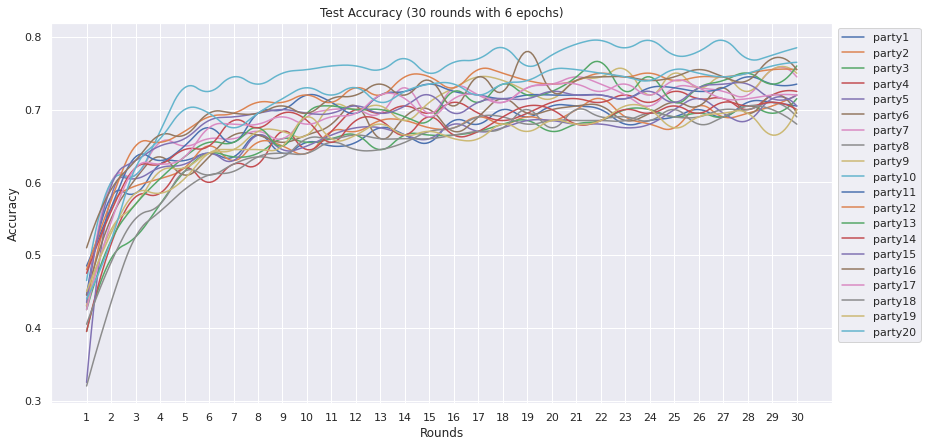

In [12]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

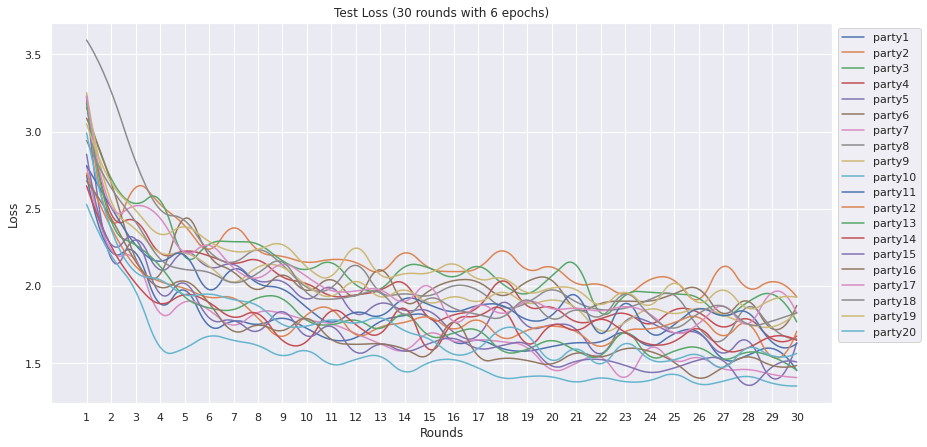

In [13]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

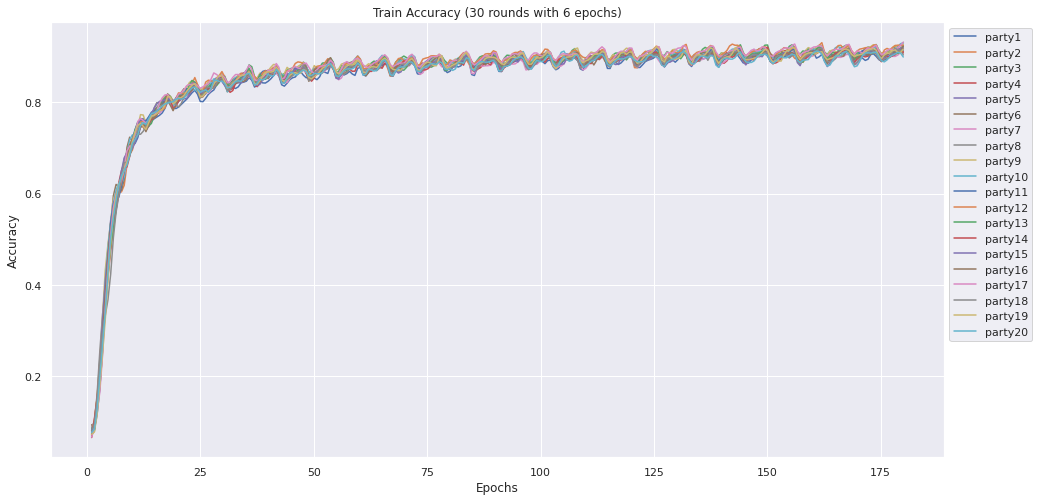

In [14]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

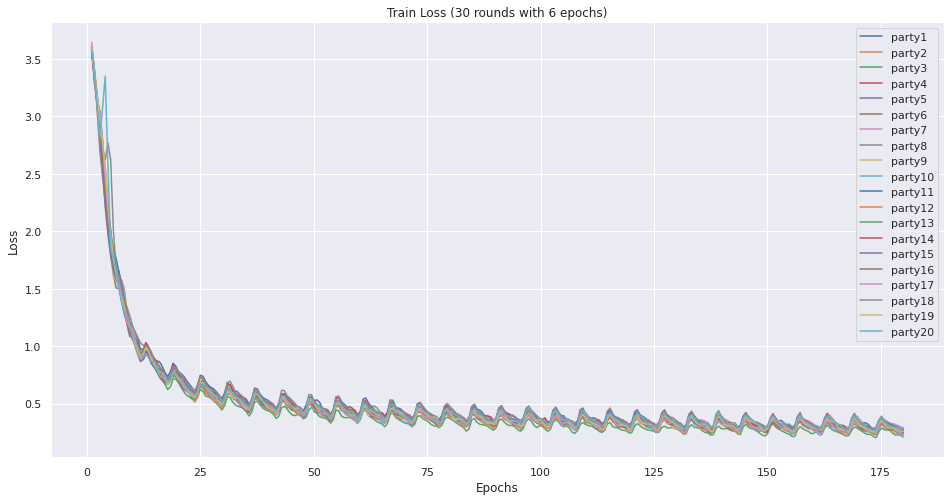

In [15]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [12]:
aggregator.model_synch()

2021-06-05T19:30:40.475Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-05T19:30:40.478Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f43392c2748>
2021-06-05T19:30:40.478Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:30:41.818Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T19:30:41.819Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:30:41.820Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:30:41.820Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [13]:
aggregator.eval_model()

2021-06-05T19:30:45.719Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-05T19:30:45.721Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:30:47.145Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T19:30:47.145Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:30:47.146Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:30:47.147Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-05T19:30:47.147Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [14]:
aggregator.save_model()

2021-06-05T19:31:15.255Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-05T19:31:15.256Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-05T19:31:18.370Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-05T19:31:18.371Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-05T19:31:18.371Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-05T19:31:18.372Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-05T19:31:18.372Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
